<a href="https://colab.research.google.com/github/comaraDOTcom/ml-applications/blob/main/Etivity3/ET5003_CONOROMARA_20151845.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-19' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "3" #@param {type:"string"}
Student_ID_Name = "Conor O'Mara 20151845" #@param {type:"string"}
Student_ID_Name = "Morgan Lynch" #@param {type:"string"}
Student_ID_Name = "Aziz Aoudjit" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

In [6]:
# Introduction

# Introduction

## Problem description & theory

This etivity approaches a machine learning problem to predict house prices using both Bayesian multinomial piecewise regression model and Bayesina Neural Network. The dataset is very similar to the previous etivity, however the addition of a Neural network is new.


However, the approach here goes further to use **NLP** (natural language processing through the package `nltk`) in an approach to derive features that can be used to train a regression model and neural network.

The prediction are then submitted to [Kaggle](www.kaggle.com) and used in a leaderboard to rank the predictions from each student's models.



## Method



1.   Expoloratory data analysis (clean data, impute values, drop features, remove outliers, perform mappings and transform distributions)
2.   NLP feature derviation. Using NLP on both `Description` and `Features`, more features are derived which have been extracted from these columns.
3. Train a Bayesian regression model, calculate the error on the validation data, make predictions on the test data, save the predictions and submit to Kaggle.
4.  Cluster the data using KMeans, to find the optimal number of clusters K (using inertia and the Silhouette metric). Train a Bayesian piecewise regression model with K segments, calculate the error on the validation data, make predictions on the test data, save the predictions and submit to Kaggle
5. Train a Bayesian Neural Network, calculate the error on the validation data, make predictions on the test data, save the predictions and submit to Kaggle.
6. Compare the performance of all the models.



## Modelling

### Piecewise Regression

Piecewise regression is a useful approach when the data follows differe $y(x)$ could be split into 3 piecewise divided functions such as for nb break points:
$$ \eta_{1} + \beta_{1}(x - b_{1} ), b_{1} < x \leq b_{2} $$
$$ \eta_{1} + \beta_{2}(x - b_{2} ), b_{2} < x \leq b_{3} $$
$$ \eta_{1} + \beta_{nb}(x - b_{nb - 1} ), b_{nb - 1} < x \leq b_{nb} $$

These separate models are easy to solve (using Pymc3) as we found out in etivity 1, however finding the breakpoints is a new step. To do this we can use the Gaussiam mixture clustering method to cluster the data on features and the get the centroids of these clusters to predict what cluster every data point belongs to and there use it to train and fit its regression model. It is a very understandable approach to a problem without increasing the complexity of the model while also not underfitting it with a simple regression model. We have separate values and training routines for $\alpha{i}$ and $\beta_{i}$ for each model.

### Bayesian Neural Network
Neural networks consist of an input layer, hidden layers, nodes, weights, activation functoins and an error function whicih we use to perform gradient descent. Non-linearity is added in the hidden layers, and after transforming it with the activation function in the output layer the model gives us point estimates with no uncertainty information. (Srihari, 2017). In order to obtain uncertainy, we can introduce the Bayesian neural network. A network with infinitely many weight with a distribution on each weight being a ***Gaussian process***. The same network with finitely many weights is know as a ***Bayesian Neural network*** (Chang, 2021).

### Etivity approach
In this etivity we use regression to predict the house prices given the training dataset. But first the data preparation and EDA approach will prepare the dataset for learning. Using thise dataset we will train a full regression model and then a piecewise regression model (where we will find the optimum number of clust 'Mean absolute error' and 'Mean absolute percentage error:
$$ \text{MAE} = \frac{1}{n}\Sigma_{i=1}^{n}|{y_{i} - \hat{y_{i}}}| $$
$$ \text{MAPE} = \frac{1}{n}\Sigma_{i=1}^{n}|\frac{{y_{i} - \hat{y_{i}}}}{y_{i}}| $$

## Dataset
The data we have in this problem is historical housing data including their prices. There is almost 3000 data points on houses sold in Ireland that we can use for training and 500 that we can use as test data. The target variable is price(or expected price) that we will try to predict using other features we have such as:


*   bathrooms
*   bedrooms
*   area
*   beds
*   ber_classification
*   description block
*   facility
* services
* features 
* latitude
* longitude
* type
* surface

Using these features, the training dataset can be prepocessed in order to be prepared for machine learning in order to make predictions as to what the price of a house might be.

From analysing these features, we identify outliers in `surface`, `latitude`, `longitude`, which we remove from the training data and then distribution and boxplot together to inspect if there are any outliers remaining.

# Imports

In [19]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [21]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [22]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import cluster

In [23]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

In [24]:
!pip install gpy

In [25]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az
import seaborn as sns

In [26]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100
sns.set_theme(context='notebook', style='ticks', palette='Accent', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# DATASET

We start off by loading the training and test dataset, and have a look at some statistics from the data

## Training & Test Data

### Google drive file paths and IO

In [369]:
#Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Path, copy the path from your Drive
Path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity3/house-data/'

training_file = Path + 'HousePrice_Train.csv'
testing_file = Path + 'HousePrice_Test.csv'

# Load training data
dftrain = pd.read_csv(training_file)

# test data
dftest = pd.read_csv(testing_file)


print("Train Data Shape:", dftrain.shape)
print("Test Data Shape:", dftest.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data Shape: (1638, 14)
Test Data Shape: (702, 13)


### Train dataset

In [370]:
# show first data frame rows 
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [371]:
# Generate descriptive statistics
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [372]:
def show_nulls(df: pd.DataFrame):
  """
  This function takes a dataframe and returns the number of nulls in each column and the percentage of 
  nulls in a column too.
  """
  nulls = pd.DataFrame(df.isna().sum())
  nulls.rename(columns = {0:'Number of Nulls'}, inplace = True) 
  nulls['% of Nulls'] = nulls['Number of Nulls']/df.shape[0]*100
  cols_with_nulls = nulls[nulls['Number of Nulls'] > 0].T.columns.tolist()
  return nulls

In [373]:
show_nulls(dftrain)

,Number of Nulls,% of Nulls
Index,0,0.000000
ID,0,0.000000
Location,0,0.000000
Num_Bathrooms,0,0.000000
Num_Beds,0,0.000000
BER_class,251,15.323565
Description,0,0.000000
Services,1061,64.774115
Features,0,0.000000
Latitude,0,0.000000


### Test dataset

In [374]:
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [375]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


In [376]:
show_nulls(dftest)

,Number of Nulls,% of Nulls
Index,0,0.000000
ID,0,0.000000
Location,0,0.000000
Num_Bathrooms,0,0.000000
Num_Beds,0,0.000000
BER_class,108,15.384615
Description,0,0.000000
Services,456,64.957265
Features,0,0.000000
Latitude,0,0.000000


### Mapping the BER classification

Both the train and test datasets contain nulls in the `BER_class` feature. Let's map this to ordinal values (the scale has an inherent order in it: https://www.seai.ie/home-energy/building-energy-rating-ber/understand-a-ber-rating/). A1 being most efficient.

In [377]:
dftrain['BER_class'].value_counts()

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

In [378]:
dftest['BER_class'].value_counts()

D1                     72
C3                     70
D2                     68
C2                     65
C1                     49
E2                     47
F                      46
E1                     44
G                      41
B3                     28
B2                     21
A3                     20
A2                      8
SINo666of2006exempt     8
B1                      7
Name: BER_class, dtype: int64

In [379]:
# define a scaler mapper that defines values
dBERClassificationMap = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
    "SINo666of2006exempt" : 16
}
dftrain['BER_class'] = dftrain['BER_class'].replace(dBERClassificationMap)
dftest['BER_class'] = dftest['BER_class'].replace(dBERClassificationMap)

In [380]:
# approach missing values with the median ()
print(f"Train BER median = {dftrain['BER_class'].median()}")
print(f"Test BER median = {dftest['BER_class'].median()}")

Train BER median = 10.0
Test BER median = 10.0


In [381]:
# Impute missing values with the median
dftrain['BER_class'].fillna(10, inplace=True)
dftest['BER_class'].fillna(10, inplace=True)

In [382]:
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,8.0,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,12.0,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,15.0,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,2.0,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,14.0,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


The BER class has now been mapped to ordinal values.

### Hot Encoding the `Type` feature

In [383]:
dftrain = pd.get_dummies(dftrain, columns=['Type'])
dftest = pd.get_dummies(dftest, columns=['Type'])

In [384]:
dftrain.head(5)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse
0,1,12409116,Ongar,2,2,9.0,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,67.00,195000,1,0,0,0,0,0,0,0,0,0
1,2,12320330,North Strand,1,2,10.0,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,425000,0,0,0,0,0,0,0,0,1,0
2,3,12405953,Stepaside,3,3,3.0,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,535000,0,0,0,0,0,1,0,0,0,0
3,4,12202582,Cabinteely,1,3,12.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,499000,0,0,1,0,0,0,0,0,0,0
4,5,12299336,Lusk,3,4,10.0,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,153.00,510000,0,0,1,0,0,0,0,0,0,0


### Removing outliers

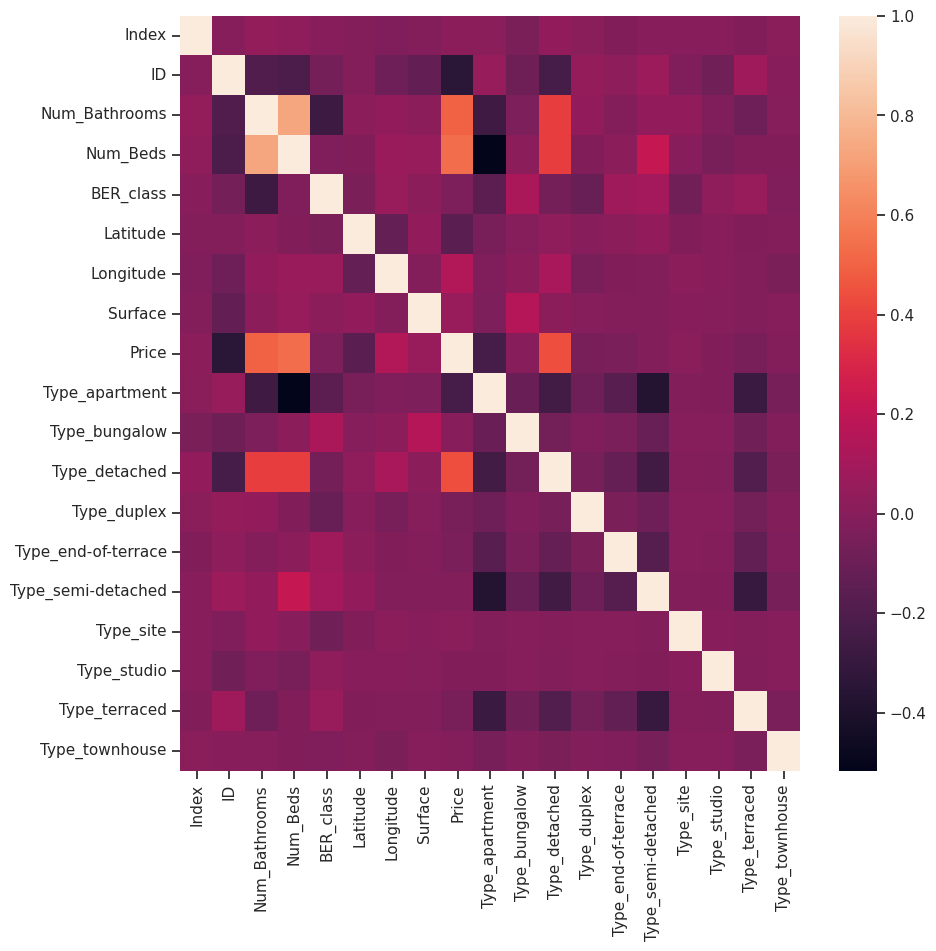

In [385]:
plt.figure(figsize=(10, 10))
sns.heatmap(dftrain.corr(), annot=False);

We see strong correlations for Price with `Type_detached`, `Num_Beds`, `Num_bathrooms`.

In [386]:
def plot_distribtion(df, feature):
    """
    Function plots the histogram and boxplot distribution of the feature side by side.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{feature}')
    sns.histplot(ax=ax1, data=df, x=feature, kde=True)
    sns.boxplot(ax=ax2,data=df,  y=feature, palette="Set2")
    plt.show()

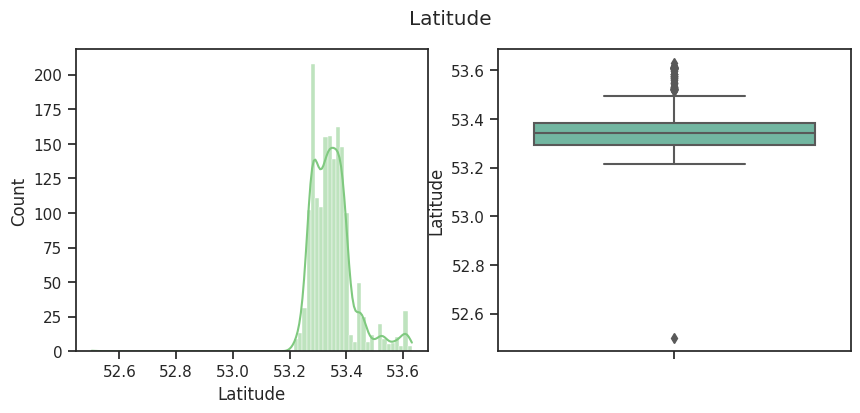

In [387]:
# lots of outliers exist in the longitudinal data
plot_distribtion(dftrain, 'Latitude')

In [388]:
# removing the outliers from the boxplot (outside of the whiskers)
from matplotlib.cbook import boxplot_stats

outliers = [y for stat in boxplot_stats(dftrain['Latitude']) for y in stat['fliers']]

In [389]:
#drop rows that contain any value outliers
dftrain = dftrain[dftrain.Latitude.isin(outliers) == False]

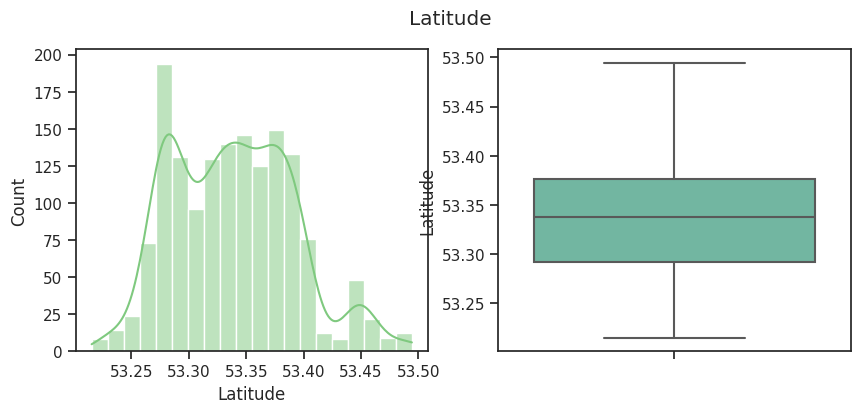

In [390]:
# Plot again with no outliers
plot_distribtion(dftrain, 'Latitude')

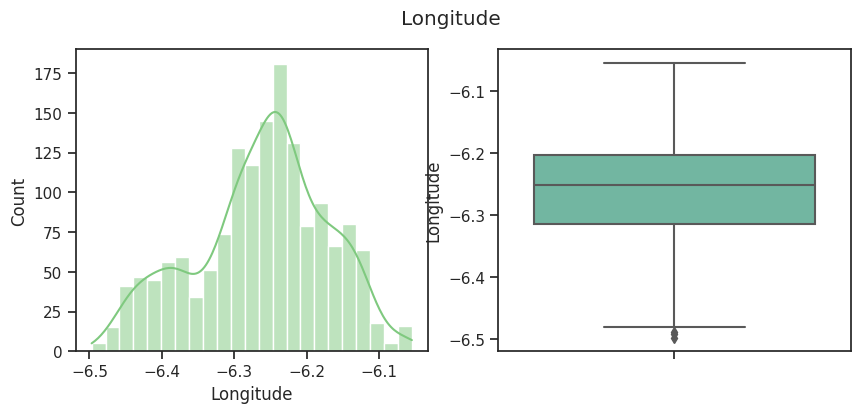

In [391]:
# Plot again with no outliers
plot_distribtion(dftrain, 'Longitude')

In [392]:
outliers = [y for stat in boxplot_stats(dftrain['Longitude']) for y in stat['fliers']]
dftrain = dftrain[dftrain.Longitude.isin(outliers) == False]

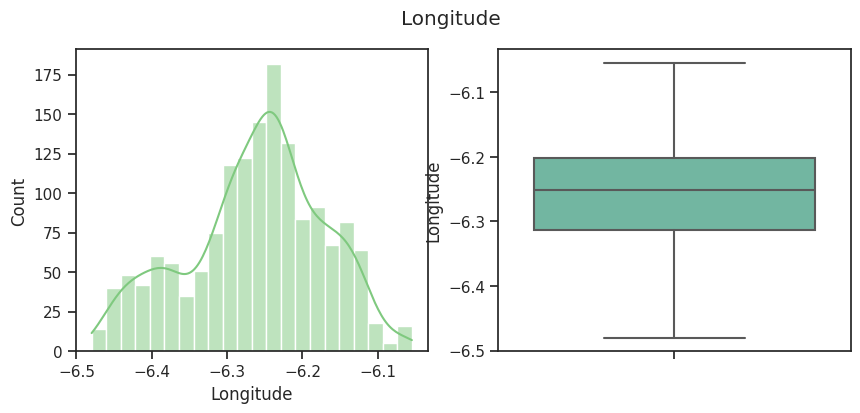

In [393]:
 #Plot again with no outliers
plot_distribtion(dftrain, 'Longitude')

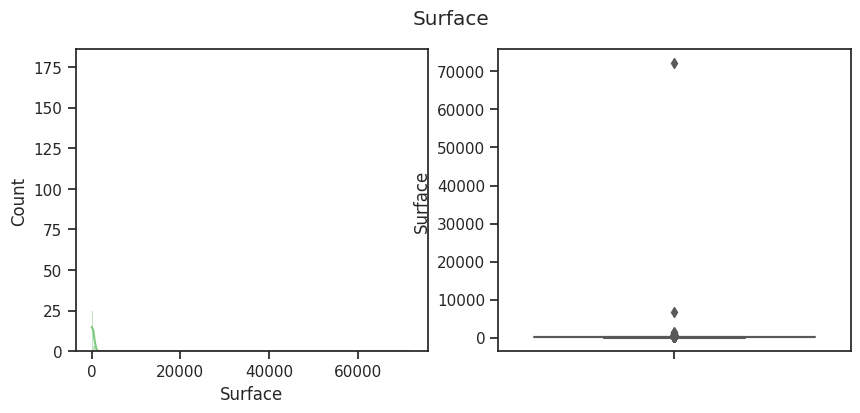

In [394]:
# Surface also has a lot of outliers
plot_distribtion(dftrain, 'Surface')

In [395]:
outliers = [y for stat in boxplot_stats(dftrain['Surface']) for y in stat['fliers']]
dftrain = dftrain[dftrain.Surface.isin(outliers) == False]

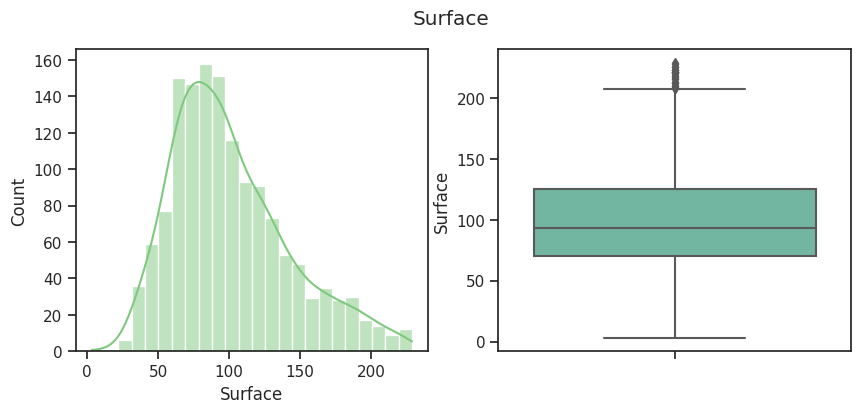

In [396]:
plot_distribtion(dftrain, 'Surface')

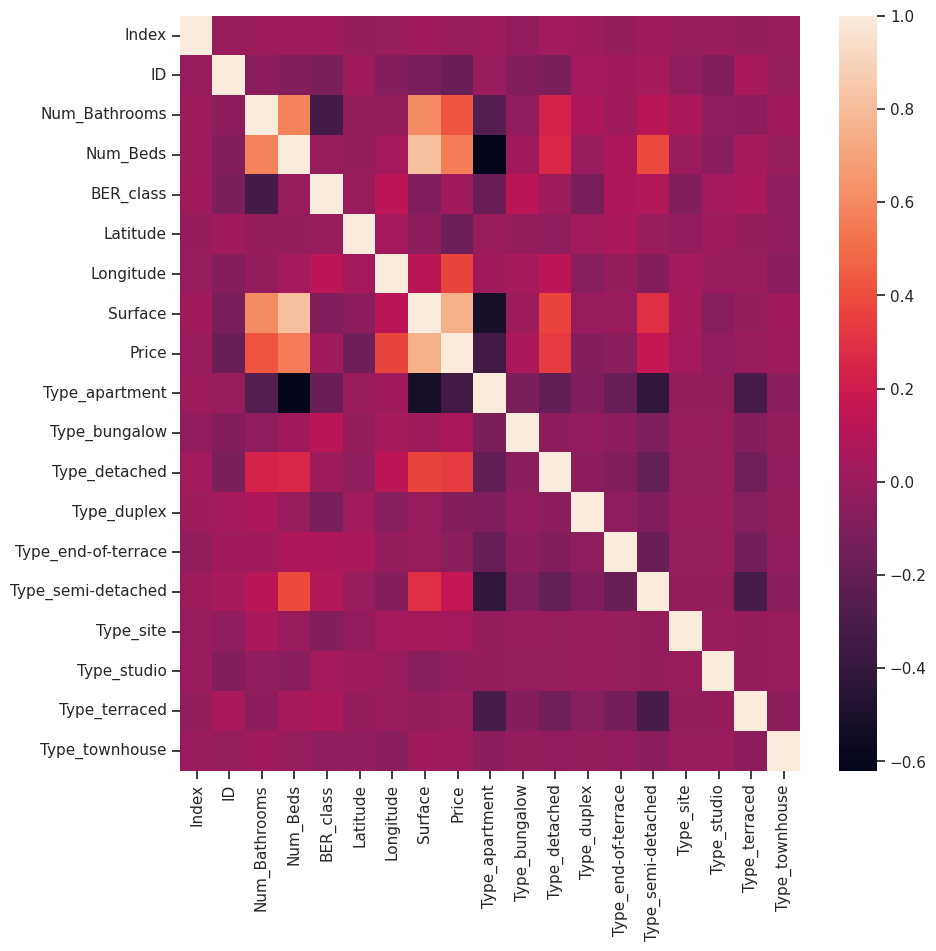

In [397]:
#Look at the correlation between the different features of our data and the house prices. 
plt.figure(figsize=(10, 10))
sns.heatmap(dftrain.corr(), annot=False);

In [398]:
dftrain['Services'].value_counts()

Parking,Gas Fired Central Heating                                                       103
Parking                                                                                  71
Parking,Gas Fired Central Heating,Wired for Cable Television                             67
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television                       58
Parking,Gas Fired Central Heating,Alarm                                                  48
Parking,Wired for Cable Television                                                       34
Gas Fired Central Heating                                                                18
Parking,Alarm                                                                            10
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchair Access     10
Parking,Wired for Cable Television,Oil Fired Central Heating                              8
Parking,Alarm,Wired for Cable Television,Oil Fired Central Heating              

From the correlation matrix after more data prep, `Surface`, `Latitude` now also correlate much better with `Price`.

## NLP modelling

In [399]:
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [400]:
import string
# add the euro sign
string.punctuation = string.punctuation + '€¢'
lStopwords = stopwords.words('english')
lStopwords.append('x')
lEstateAgentSpeak = ['bedroom', 'bathroom', 'kitchen', 'floor', 'heating', 'apartment', 'studio', 'terraced', 'townhouse', 'bungalow', 'duplex', 'end-of-terrace', 'home', 'family', 'entrance', 'hall', 'dining', 'room', 'sink', 'living', 'wash', 'hand', 'basin', 'double']
lEstateAgentSpeak.extend(['washing', 'machine', 'within', 'facing', 'extractor', 'fan', 'hob', 'access', 'delighted', 'present', 'splash', 'window', 'fired', 'door', 'hot', 'press', 'de', 'attachment', 'shower', 'bath', 'would'])
lStopwords.extend(lEstateAgentSpeak)
lStoplist = lStopwords + list(string.punctuation)
stoplist = set(lStoplist)

words = set(nltk.corpus.words.words())

In [401]:
translate_table = dict((ord(char), None) for char in string.punctuation)

def preprocess(sText, translate_table):
  """Preprocess text:  1.  Expand contractions (like "n't")
     2.  Remove punctuation
     3.  Tokenise any strings which are not in the stoplist and not digits
     4.  Convert to lower-case
     """
  return [sWord.lower() for sWord in word_tokenize(sText) if sWord.lower() not in stoplist and sWord.lower() in words and sWord.isalpha()]

In [402]:
dftrain['TokenisedDescription'] = dftrain['Description'].apply(preprocess,translate_table=translate_table)
dftrain['TokenisedFeatures'] = dftrain['Features'].apply(preprocess,translate_table=translate_table)

dftest['TokenisedDescription'] = dftest['Description'].apply(preprocess, translate_table=translate_table)
dftest['TokenisedFeatures'] = dftest['Features'].apply(preprocess, translate_table=translate_table)

In [403]:
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,TokenisedDescription,TokenisedFeatures
0,1,12409116,Ongar,2,2,9.0,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,67.00,195000,1,0,0,0,0,0,0,0,0,0,"[market, chipping, row, two, comes, market, ex...",[none]
1,2,12320330,North Strand,1,2,10.0,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,425000,0,0,0,0,0,0,0,0,1,0,"[terrace, charming, red, brick, period, set, s...","[bight, spacious, interior, numerous, original..."
2,3,12405953,Stepaside,3,3,3.0,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,535000,0,0,0,0,0,1,0,0,0,0,"[welcome, cotter, close, immaculately, three, ...","[special, large, rear, garden, generous, stree..."
3,4,12202582,Cabinteely,1,3,12.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,499000,0,0,1,0,0,0,0,0,0,0,"[welcome, sycamore, walk, enjoying, premier, a...","[wonderful, bed, detached, accommodation, enjo..."
5,6,12225979,Glasnevin,1,3,12.0,Property Team Lappin Estates take great pleasu...,NaN,None,53.380367,-6.279310,140.00,360000,0,0,0,0,0,0,0,0,1,0,"[property, team, take, great, pleasure, market...",[none]


In [404]:
from nltk.stem import WordNetLemmatizer

oLemmatizerObj = WordNetLemmatizer()

In [405]:
def lemmatise(lListOfTokens,lemmatizerObj):
  """Apply Lemmatizer to a list of tokens"""
  lReturn = [oLemmatizerObj.lemmatize(sWord) for sWord in lListOfTokens]
  return lReturn

In [406]:
dftrain['LemmatizedDescription'] = dftrain['TokenisedDescription'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)
dftrain['LemmatizedFeatures'] = dftrain['TokenisedFeatures'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)


dftest['LemmatizedDescription'] = dftest['TokenisedDescription'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)
dftest['LemmatizedFeatures'] = dftest['TokenisedFeatures'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)

In [407]:
dftrain['LemmatizedFeatures'] = dftrain.LemmatizedFeatures.apply(lambda x: [i for i in x if i != 'none'])
dftest['LemmatizedFeatures'] = dftest.LemmatizedFeatures.apply(lambda x: [i for i in x if i != 'none'])

In [408]:

# Convert descriptions in training data to a list
lTrainingDescriptions = dftrain['LemmatizedDescription'].tolist()
# This will be a list of lists.  Merge into a single list to analyse bigrams and trigrams

lMergedTrainingDescriptions = []
for lDescription in lTrainingDescriptions:
  lMergedTrainingDescriptions.extend(lDescription)

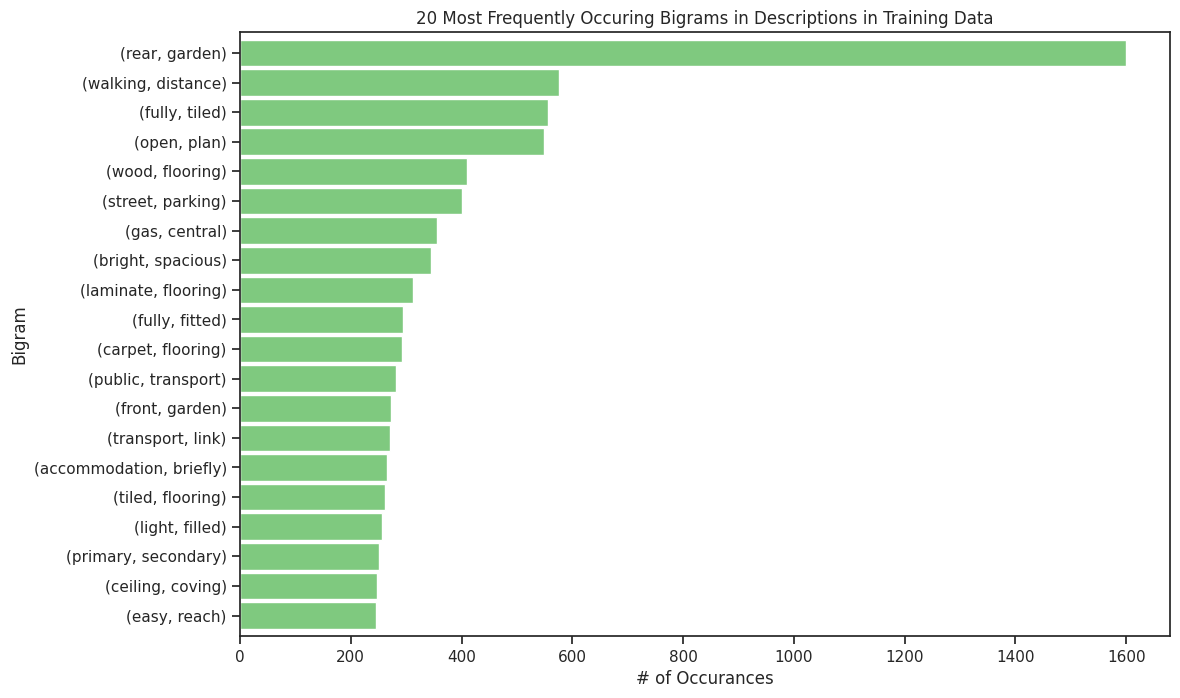

In [409]:
from nltk.util import ngrams
bigrams_series = (pd.Series(nltk.ngrams(lMergedTrainingDescriptions, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(lMergedTrainingDescriptions, 3)).value_counts())[:20]
bigrams_series.sort_values().plot.barh( width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams in Descriptions in Training Data')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

Let's make these 20 bi-grams into features

In [410]:
lFeat = dftrain['LemmatizedFeatures'].tolist()
lF = []
for l in lFeat:
  lF.extend(l)

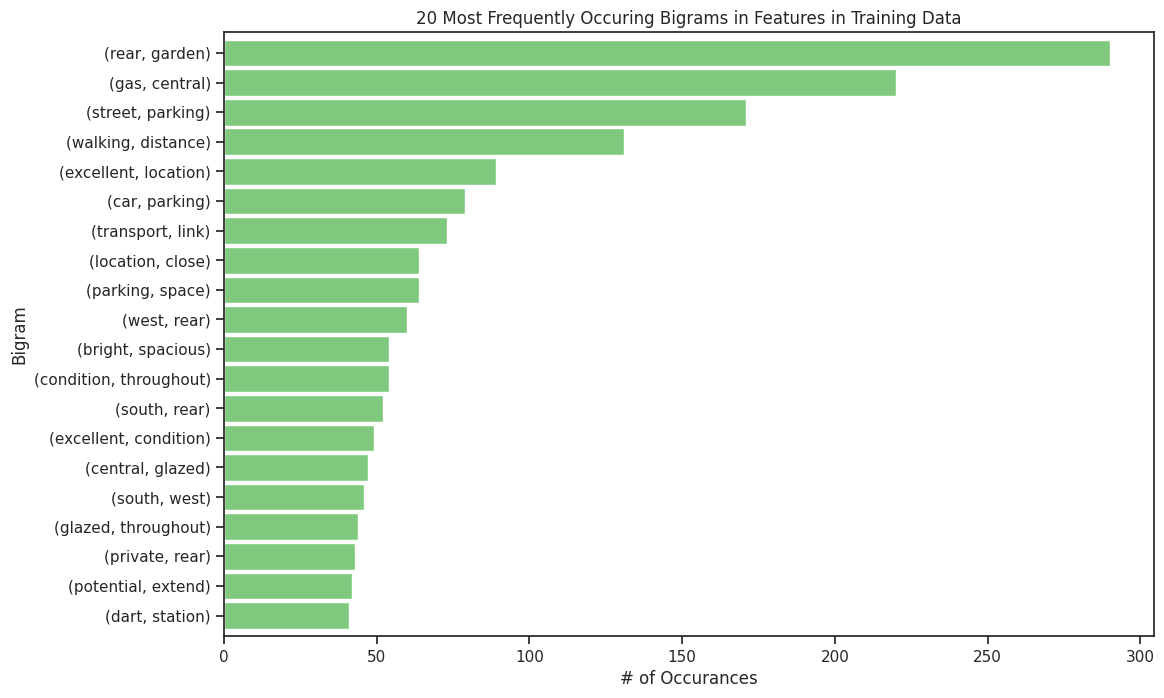

In [411]:

bigrams_series_features = (pd.Series(nltk.ngrams(lF, 2)).value_counts())[:20]
trigrams_series_features = (pd.Series(nltk.ngrams(lF, 3)).value_counts())[:20]
bigrams_series_features.sort_values().plot.barh(width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams in Features in Training Data')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

In [412]:
dftrain['LemmatizedDescriptionString'] = dftrain['LemmatizedDescription'].str.join(' ')
dftest['LemmatizedDescriptionString'] = dftest['LemmatizedDescription'].str.join(' ')
dftrain['LemmatizedFeaturesString'] = dftrain['LemmatizedFeatures'].str.join(' ')
dftest['LemmatizedFeaturesString'] = dftest['LemmatizedFeatures'].str.join(' ')

In [413]:
dftrain['DescriptionAndFeatures'] = dftrain['LemmatizedDescriptionString'] + dftrain['LemmatizedFeaturesString']
dftest['DescriptionAndFeatures'] = dftest['LemmatizedDescriptionString'] + dftest['LemmatizedFeaturesString']

### TF IDF vectorisation to exclude most prevalent and least common words.

In [414]:
from  sklearn.feature_extraction.text import TfidfVectorizer
oTfIdf = TfidfVectorizer(min_df=0.05, max_df=0.95,ngram_range=(2,3))


In [415]:
npTfIdfTrain = oTfIdf.fit_transform(dftrain['DescriptionAndFeatures'])
df_tdf_train = pd.DataFrame(npTfIdfTrain.toarray(), columns = oTfIdf.get_feature_names())

In [416]:
npTfIdfTest = oTfIdf.transform(dftest['DescriptionAndFeatures'])
df_tdf_test = pd.DataFrame(npTfIdfTest.toarray(), columns=oTfIdf.get_feature_names())

In [417]:
# drop text features
dftrain.drop(columns=['Description','Features','TokenisedDescription','TokenisedFeatures','LemmatizedDescription','LemmatizedFeatures', 'LemmatizedDescriptionString', 'LemmatizedFeaturesString','DescriptionAndFeatures'], axis=1, inplace=True)
dftest.drop(columns=['Description','Features','TokenisedDescription','TokenisedFeatures','LemmatizedDescription','LemmatizedFeatures', 'LemmatizedDescriptionString','LemmatizedFeaturesString','DescriptionAndFeatures'], axis=1, inplace=True)

In [418]:
dftrain = pd.concat([dftrain,df_tdf_train], axis=1)
dftest  = pd.concat([dftest,df_tdf_test], axis=1)

In [425]:
dftrain.dropna(inplace=True)
dftest.dropna(inplace=True)

In [427]:
dftrain = dftrain.drop(['Location', 'Services'], axis=1)
dftest = dftest.drop(['Location', 'Services'], axis=1)

KeyError: ignored

In [428]:
dftest.shape

(702, 175)

### XGBoost for feature importance

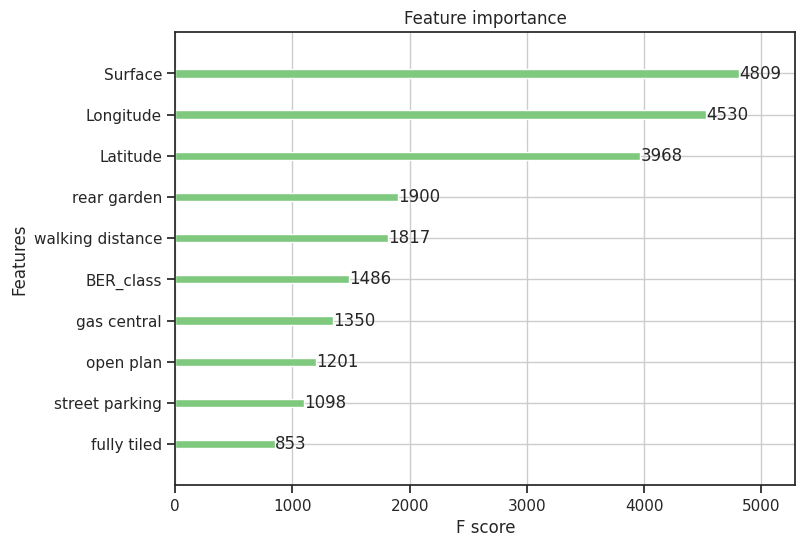

In [429]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

dfTrainCopy = dftrain.copy()
dfTrainIndex = dfTrainCopy['Index']
dfTrainCopy.drop(['Index', 'ID'], axis=1,inplace=True)
# For train/test split, 'price' is our label, so drop this when assigning X
X = dfTrainCopy.drop('Price',axis=1)
y = dfTrainCopy['Price']
X_train,X_validate,y_train,y_validate = train_test_split(X, y, test_size=0.3, random_state=43)
oModel = XGBClassifier()
oModel.fit(X_train, y_train)
# plot feature importance
plot_importance(oModel, max_num_features=10)
plt.show()

In [435]:
FeaturesTrain = ['Surface', 'Longitude', 'Latitude', 'rear garden', 'walking distance', 'gas central', 'BER_class', 'open plan', 'fully tiled', 'street parking']

In [443]:
df_train = dftrain[FeaturesTrain + ['Price']]
df_test = dftest[FeaturesTrain]

In [444]:
df_train.shape

(1259, 11)

In [445]:
df_test.shape

(702, 10)

## Prep data for modelling

In [ ]:
df_train.shape

In [ ]:
df_test.shape

In [ ]:
#Check that all our nan values are now removed
print('Number of nan in df_subset_train dataset: ',df_subset_test.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [446]:
# train set, input columns
Xs_full_train = df_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_full_train = df_train.iloc[:,-1].values

# test set, input columns
Xs_test = df_test.iloc[:,0:].values 

print("Xs_train shape:", Xs_full_train.shape)
print("ys_train shape:", ys_full_train.shape)

print("Xs_test shape:", Xs_test.shape)

Xs_train shape: (1259, 10)
ys_train shape: (1259,)
Xs_test shape: (702, 10)


In prder to validate our models, we need to perform some kind of validation, Since our test data has no true values, instead we split our training data into train and validation sub-datasets, we can train our models on the training data, and evaluate them on our validation dataset. We can then predict our house prices on the test dataset

In [447]:
#We split the training dataset into training and validation, so we can validate/evaluate the model on the training data
Xs_train,Xs_val,ys_train,ys_val = train_test_split(Xs_full_train, ys_full_train, test_size=0.2)
ys_train = ys_train.reshape(-1,1)

print("X train shape:", Xs_train.shape)
print("y train shape:", ys_train.shape)
print("X validation shape:", Xs_val.shape)
print("y validation shape:", ys_val.shape)

print("X test shape:", Xs_test.shape)

X train shape: (1007, 10)
y train shape: (1007, 1)
X validation shape: (252, 10)
y validation shape: (252,)
X test shape: (702, 10)


In [ ]:
Xs_train[1:3,:]

array([[ 4.00000000e+00,  2.00000000e+00,  5.32593710e+01,
        -6.14918300e+00,  1.22600000e+02,  0.00000000e+00,
         0.00000000e+00,  1.14376464e-01,  1.00000000e+01],
       [ 2.00000000e+00,  1.00000000e+00,  5.33207510e+01,
        -6.31279800e+00,  7.68200000e+01,  1.10030707e-01,
         1.03084364e-01,  0.00000000e+00,  8.00000000e+00]])

In [448]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train, Xs_train[:,[2]]**2, Xs_train[:,[3]]**2, (Xs_train[:,[2]]*Xs_train[:,[3]])])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test, Xs_test[:,[2]]**2, Xs_test[:,[3]]**2, (Xs_test[:,[2]]*Xs_test[:,[3]])])
Xn_test = xscaler.transform(Xss_test)

Xss_val = np.hstack([Xs_val, Xs_val[:,[2]]**2, Xs_val[:,[3]]**2, (Xs_val[:,[2]]*Xs_val[:,[3]])])
Xn_val = xscaler.transform(Xss_val)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

#We don't want to scale or transform our validation true values
yn_val = ys_val

## Bayesian regression

We will start off with a Bayesian full model as a baseline

In [449]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=100, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 965.15


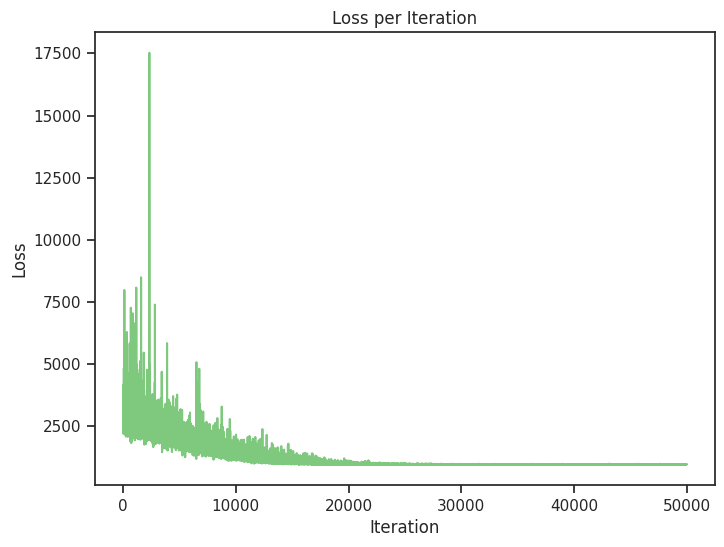

In [450]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [451]:
# samples from the posterior
posterior = approximation.sample(5000)

In [452]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - yn_val))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - yn_val) / yn_val)))

MAE =  103684.76086994066
MAPE =  0.21848395320270125


We can see from the results of our full model, the Mean Absolute Percentage Error is around 21.8%

In [453]:
#Predict the house prices on our final test data

# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_test = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

In [454]:
#We create an output file of the predicted house prices for the test dataset along with their index
df = pd.DataFrame({"Index" :  dftest.iloc[:,0].values , "Price" : y_pred_test})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df.to_csv(Path + 'BayesianRegressionPredictions/' + f"House Price Prediction_Bayesian_FullModel_{date}.csv", index=False)

### Gaussian Mixture Model 
We need to determine the optimum number of clusters to use

### Determine the number of clusters - K-Means

In [455]:
from sklearn import cluster

inertia = []
for k in range(1,15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    inertia.append(clustered_data_sklearn.inertia_)

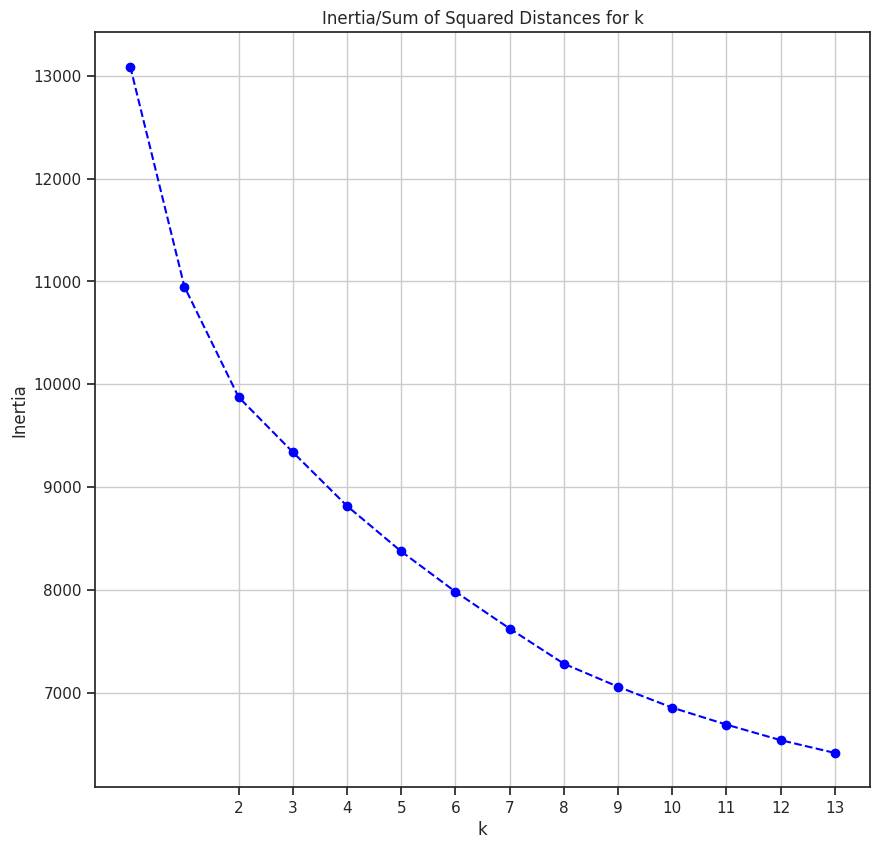

In [456]:
# plot to see if there is a clear elbow
plt.figure(figsize=(10,10))
plt.title('Inertia/Sum of Squared Distances for k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2, 30))
plt.grid()
plt.plot(inertia, linestyle='--', marker='o', color='b')
plt.show()

In [457]:
from sklearn import metrics

silhouette_coefficients = []
   
# Start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    score = metrics.silhouette_score(Xn_train, clustered_data_sklearn.labels_)
    silhouette_coefficients.append(score)

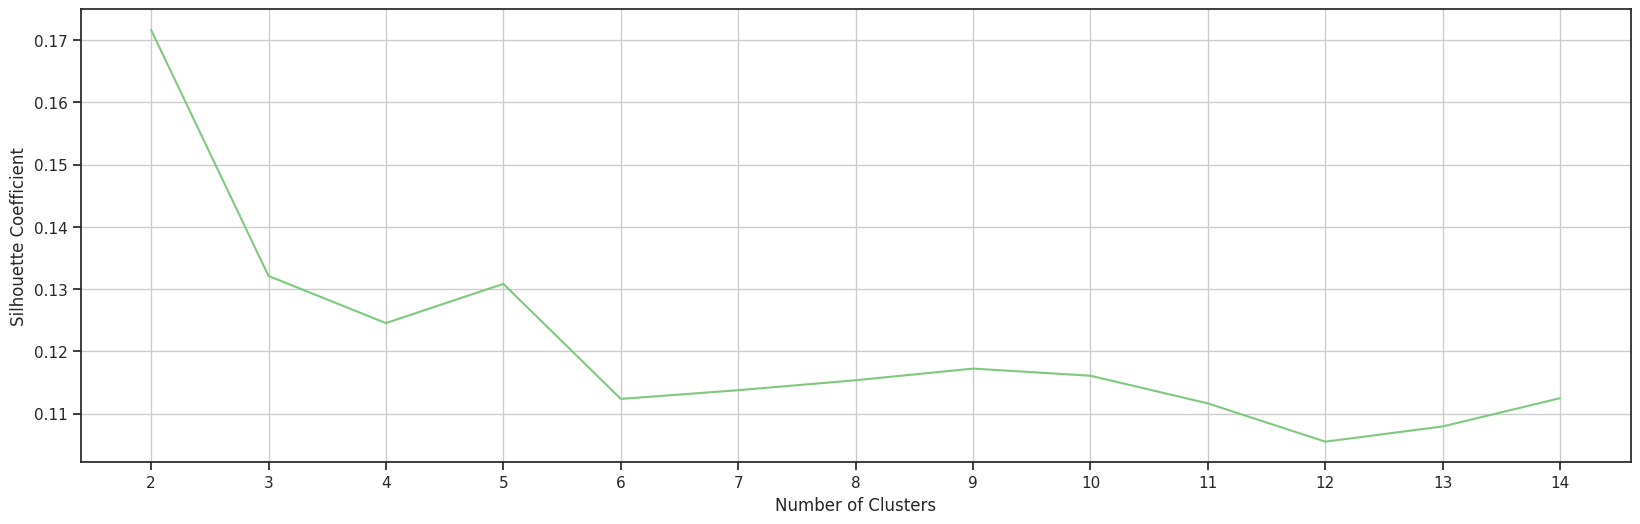

In [458]:
plt.figure(figsize=(20,6))
plt.plot(range(2,15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xticks()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

From the plot above, the elbow seems to occur at 5 clusters, so we will use that

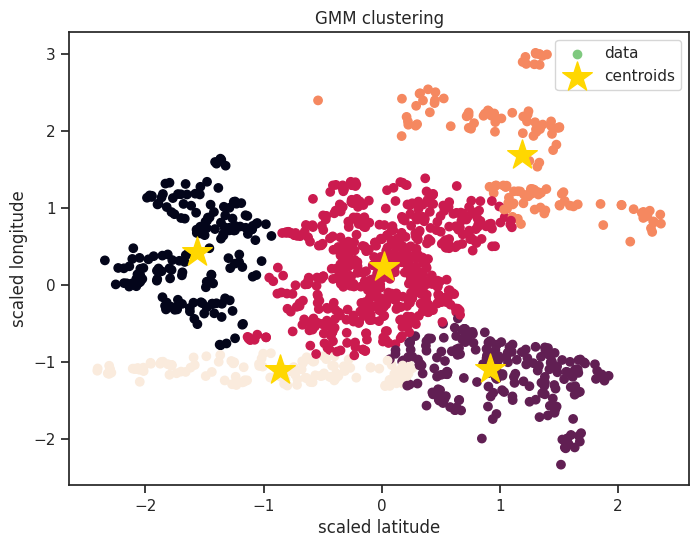

In [464]:
from sklearn.mixture import GaussianMixture
# training gaussian mixture model 
gmm = GaussianMixture(n_components=5)
# clustering by features 2, 3(lat-long)
ind=[1,2]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
labels = gmm.predict(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1], c = labels, label='data')
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], c='gold', marker='*', s=500, label='centroids')
plt.title('GMM clustering')
plt.ylabel('scaled longitude')
plt.xlabel('scaled latitude')
plt.legend()
plt.show()


### Generating Clusters of Data

In [465]:
# split the data for train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))


{0: 136, 1: 178, 2: 473, 3: 104, 4: 116}

In [466]:
# split the data for validation clusters
clusters_test = gmm.predict(Xn_val[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 37, 1: 39, 2: 121, 3: 38, 4: 17}

In [467]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_val[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [468]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_val[clusters_test==1,:]

ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [469]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_val[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)


In [470]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_val[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [471]:
# cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_val[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

## Piecewise Model
Train a different model on each of the clusters individually

In [472]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 200.22


In [473]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 209.56


In [474]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 442.98


In [475]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 179.05


In [476]:
# model_4
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 165.57


## Simulations
We review how the predicted values from the model compare with the true values using posterior predictive checks

In [477]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred



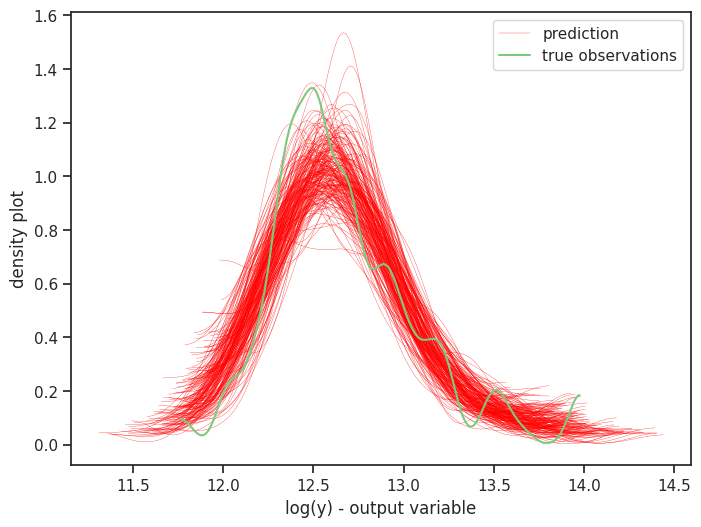

In [478]:
#Simulation CLuster 0
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

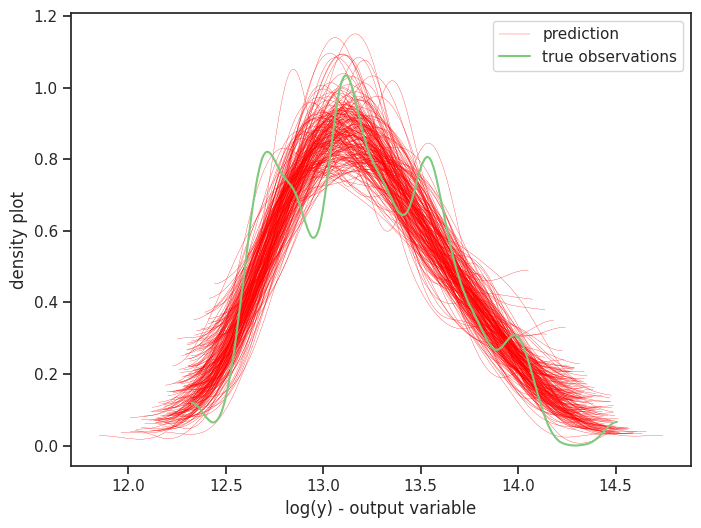

In [479]:
#Simulation Cluster 1
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

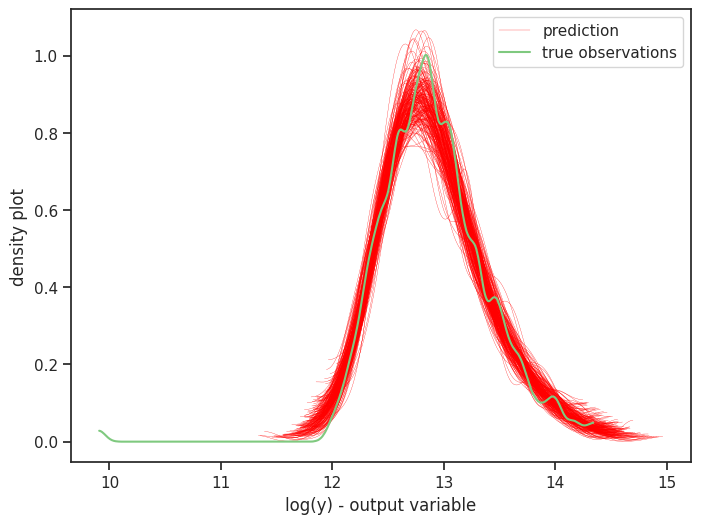

In [480]:
#Simulation Cluster 2
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

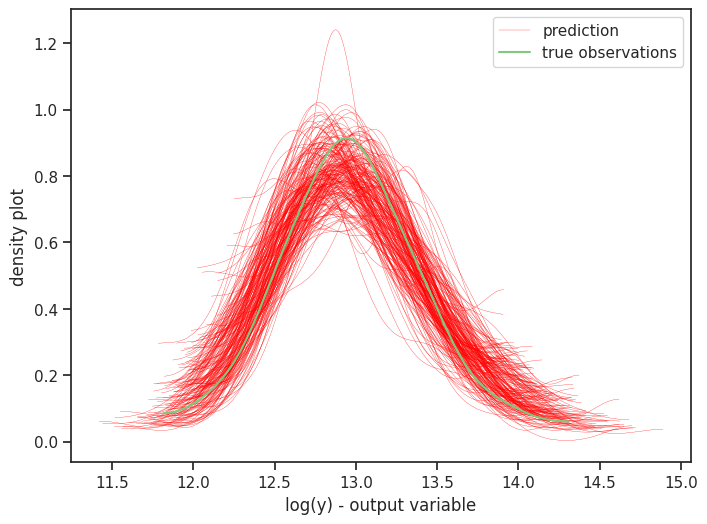

In [481]:
#Simulation Cluster 3
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

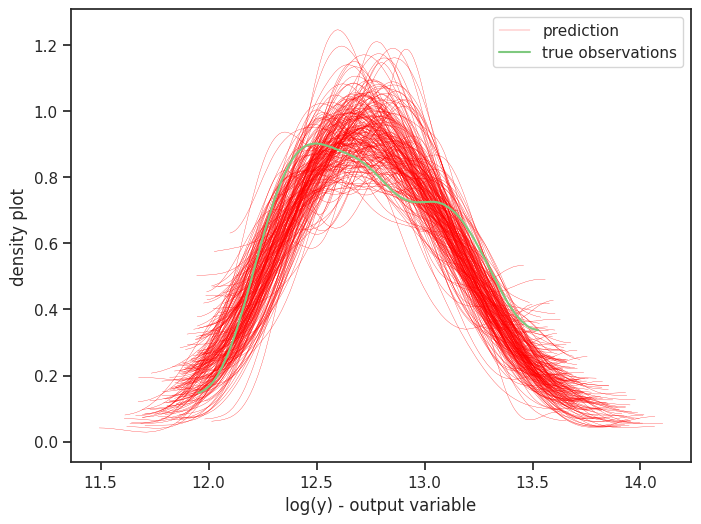

In [482]:
#Simulation Cluster 4
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

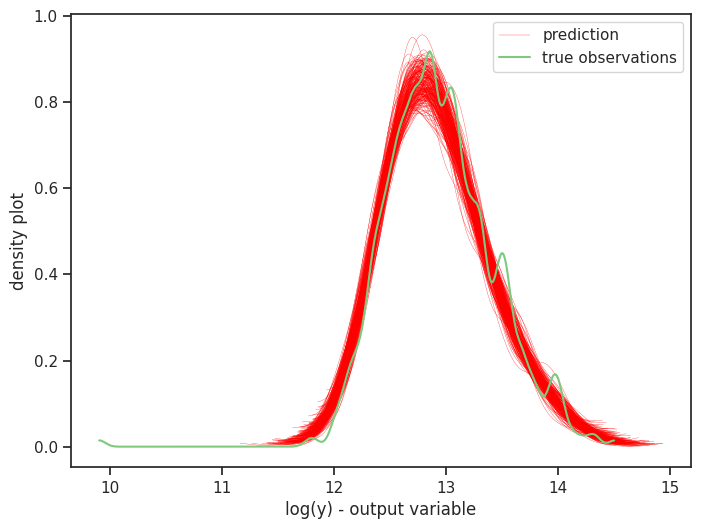

In [484]:
#Simulation on all clusters combined
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)
# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Evaluate Performance on Validation Dataset

In [485]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", \nMAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - yn_val[clusters_test==0]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR0 - yn_val[clusters_test==0]) /yn_val[clusters_test==0])))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - yn_val[clusters_test==1]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR1 - yn_val[clusters_test==1]) /yn_val[clusters_test==1])))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - yn_val[clusters_test==2]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR2 - yn_val[clusters_test==2]) /yn_val[clusters_test==2])))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - yn_val[clusters_test==3]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR3 - yn_val[clusters_test==3]) /yn_val[clusters_test==3])))

# cluster 4
# cluster 3
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("Size Cluster4", np.sum(clusters_test==4), ", MAE Cluster4=",
      (np.mean(abs(y_pred_BLR4 - yn_val[clusters_test==4]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR4 - yn_val[clusters_test==4]) /yn_val[clusters_test==4])))

# joint
joint=np.hstack([abs(y_pred_BLR0 - yn_val[clusters_test==0]),
                 abs(y_pred_BLR1 - yn_val[clusters_test==1]),
                 abs(y_pred_BLR2 - yn_val[clusters_test==2]),
                 abs(y_pred_BLR3 - yn_val[clusters_test==3]),
                 abs(y_pred_BLR4 - yn_val[clusters_test==4])])

joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - yn_val[clusters_test==0]) /yn_val[clusters_test==0],
                        abs(y_pred_BLR1 - yn_val[clusters_test==1]) /yn_val[clusters_test==1],
                        abs(y_pred_BLR2 - yn_val[clusters_test==2]) /yn_val[clusters_test==2],
                        abs(y_pred_BLR3 - yn_val[clusters_test==3]) /yn_val[clusters_test==3],
                        abs(y_pred_BLR4 - yn_val[clusters_test==4]) /yn_val[clusters_test==4]
                       ]))

# MAE
print("Overall MAE=",np.mean(joint))
print("Overall MAPE = ", joint_mape)

Size Cluster0 37 , 
MAE Cluster0= 55721.24587547186
MAPE =  0.15462773208326397
Size Cluster1 39 , MAE Cluster1= 106842.50530623586
MAPE =  0.1925610846153229
Size Cluster2 121 , MAE Cluster2= 91860.94959828637
MAPE =  0.17949816256567638
Size Cluster3 38 , MAE Cluster3= 79658.46763270702
MAPE =  0.17628659078572442
Size Cluster4 17 , MAE Cluster4= 36358.598250251685
MAPE =  0.1187495580434903
Overall MAE= 83289.03430962483
Overall MAPE =  0.17328578965921454


We can see approximately 3-4% improvement for the piecewise regression models vs the model on the full dataset

We now need to predict the Final Test Values

In [486]:
#Add the index column back onto Test data
Xn_test_with_index = np.hstack((dftest.Index[:, None],Xn_test))

#Create clusters for our test data
clusters_final_test = gmm.predict(Xn_test_with_index[:,ind])

#Get cluster with the index value included
Xtestn0_final = Xn_test_with_index[clusters_final_test==0,:]

#Store the index of the cluster data
idx_cluster0 = Xtestn0_final[:,0]
#Remove the index column for prediction
Xtestn0_final = Xtestn0_final[:,1:]


In [488]:
#We now need to predict the Final Test Values

#Add the index column back onto Test data
Xn_test_with_index = np.hstack((dftest.Index[:, None],Xn_test))

#Create clusters for our test data
clusters_final_test = gmm.predict(Xn_test_with_index[:,ind])

#Get cluster with the index value included
Xtestn0_final = Xn_test_with_index[clusters_final_test==0,:]
Xtestn1_final = Xn_test_with_index[clusters_final_test==1,:]
Xtestn2_final = Xn_test_with_index[clusters_final_test==2,:]
Xtestn3_final = Xn_test_with_index[clusters_final_test==3,:]
Xtestn4_final = Xn_test_with_index[clusters_final_test==4,:]

#Store the indexes for cluster
idx_cluster0 = Xtestn0_final[:,0]
idx_cluster1 = Xtestn1_final[:,0]
idx_cluster2 = Xtestn2_final[:,0]
idx_cluster3 = Xtestn3_final[:,0]
idx_cluster4 = Xtestn4_final[:,0]

#Remove the index from the cluster again for prediction
Xtestn0_final = Xtestn0_final[:,1:]
Xtestn1_final = Xtestn1_final[:,1:]
Xtestn2_final = Xtestn2_final[:,1:]
Xtestn3_final = Xtestn3_final[:,1:]
Xtestn4_final = Xtestn4_final[:,1:]


y_pred_test0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0_final.T)))
y_pred_test1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1_final.T)))
y_pred_test2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2_final.T)))
y_pred_test3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3_final.T)))
y_pred_test4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4_final.T)))

In [489]:
#JOin the CLuster indexes with their predicted value to ensure there is no mix up
pred_0 = np.hstack((idx_cluster0[:, None], y_pred_test0[:, None]))
pred_1 = np.hstack((idx_cluster1[:, None], y_pred_test1[:, None]))
pred_2 = np.hstack((idx_cluster2[:, None], y_pred_test2[:, None]))
pred_3 = np.hstack((idx_cluster3[:, None], y_pred_test3[:, None]))
pred_4 = np.hstack((idx_cluster4[:, None], y_pred_test4[:, None]))

#Combine all predicted results together
final_prediction_piecewise = np.vstack((pred_0, pred_1, pred_2, pred_3, pred_4))

#Sort the final predictions on index again, just to have final index in order
final_prediction_piecewise = final_prediction_piecewise[final_prediction_piecewise[:, 0].argsort()]

#We create an output file of the predicted house prices for the test dataset along with their index
df = pd.DataFrame({"Index" :  final_prediction_piecewise[:,0] , "Price" : final_prediction_piecewise[:,1]})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df['Index'] = df['Index'].astype(int)
df.set_index('Index')
df.to_csv(Path + 'BayesianPiecewisePredictions/' + f"House Price Prediction_Bayesian_Piecewise_{date}.csv", index=False)

In [490]:
df

,Index,Price
0,1639,4.126408e+05
1,1640,4.585979e+05
2,1641,9.207999e+05
3,1642,7.336627e+05
4,1643,4.424520e+05
...,...,...
697,2336,2.196877e+05
698,2337,2.837219e+05
699,2338,9.040535e+05
700,2339,6.090942e+05


BAYESIAN NN

In [509]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 30
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [510]:
# we can do instead an approximated inference
param3 = 10000 
VI = 'advi'  
OP = pm.sgd 
LR = 0.1    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 1,272.4


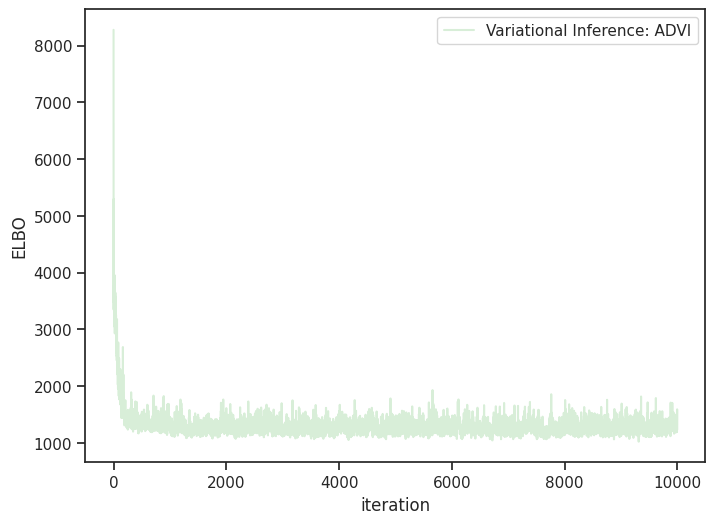

In [511]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [512]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

###Evaluate model on validation data set

In [513]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_val_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_val_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_val_pred = np.array(y_val_pred).mean(axis=0)

In [514]:
#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_val_pred))

In [515]:
print("MAE = ",(np.mean(abs(y_val_pred_final - yn_val))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - yn_val) / yn_val)))

MAE =  91660.72253308127
MAPE =  0.20854282847724462


We can see from the MAPE, the Bayesian Neural Network has improved performance by 2-3% on the Piecewise regression model above

###Predict new y values for test data

In [516]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [517]:
y_pred_final = np.exp(yscaler.inverse_transform(y_pred))

In [518]:
#We create an output file of the predicted house prices for the test dataset along with their index. This was the file uploaded to kaggle.
df = pd.DataFrame({"Index" :  dftest.iloc[:,0].values , "Price" : y_pred_final})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df['Index'] = df['Index'].astype(int)
df.set_index('Index')
df.to_csv(Path + 'BNN/' + f"House Price Prediction_{date}.csv", index=False)

# SUMMARY

Our goal in this Etivity was to build multiple supervised machine learning models to predict house prices, incorporating NLP to determine new features to add to our existing ones supplied in the dataset. In section 3 we carried out some Exploratory Data Analysis (EDA) to visualise and interprit the data supplied. We performed some pre-processing steps on the data to ensure some irrelevant columns were removed, and also outliers in our dataset were removed. We then used a heatmap to determine the relationship between the price and the input variables.

In section 4, we used NLP to introduce new features into our model. We started by performing some cleansing of our "Features" column, before calculating the TF-IDF scores for the different words used. We selected three new features to add to our model based on the NLP.

In section 5, we trained a baseline Bayesian regression model on our full dataset, and calculated the MAE and MAPE of the resulting model. We then used a Gaussain Mixture Model to determine the optimum number of clusters to use for our piecewise regression, based on a plot of latitude vs longitude. We also used K-Means clustering and the elbow method to try another approach to determine the number of clusters to use, and between both approaches I settled on four clusters as the optimum.

Having decided on the number of clusters, we split out the training and validation datasets into their respective clusters. Each of the clusters contained a reasonable number of samples. We proceed to train an individual model on each of the five clusters using a Bayesian approach. We compare the predicted values vs the true values for each of our training clusters. We evaluate our model on the validation dataset, comparing the predicted values from the model with the true values for the house prices. Following is a comparison of the results from the full model vs piecewise regression approach:

**Full Model:**

MAE =  171366.69424216385

MAPE =  0.25240352567387386

**Piecewise model:**

Overall MAE= 164448.26715735308

Overall MAPE =  0.2120414631424098

From the results we can see that we got an approximately 3-4% improvement on the predictions when we used the piecewise regression approach. We would expect to see an improvement in the results with the piecewise regression model, as each cluster is trained individually using linear regression and we can fit the data more accurately.

Finally, in section 6 we trained a Bayesian Neural Network on the data, using an input layer, a hidden layer and an output layer in the network. We draw samples from the posterior, and use these to predict the house prices on our validation dataset. The following are the results from the BNN:

**BNN model:**

MAE =  151283.54814633154

MAPE =  0.20843973298555726

Again, we can see an improvement from other models using the BNN. The best MAPE achieved over multiple runs was approximately 17% MAPE. We then used the posterior to predict the house prices from our test dataset, and uploaded these to Kaggle.

It may be possible to get better results by doing some further pre-processing of the data to ensure that the features used had a normal distribution across the data. We could also spend more time cleansing the data and possibly utilising more of the features when predicting the target variable. 

Given more time we could have explored further the results of the NLP to determine the best features to use in our new model. I choose three new features for garden, parking and heating as these three words appeared in the top 100 list from the NLP process, but we could have used XG-Boost for example on the top 100 list to determine which ones had the best correlation with price, and use these. There may also be scope for using a lot more of the features, and using feature reduction techniques to combine features. 

Certainly, the BNN seems to give the best overall results from the different models, as would be expected. It would have been nice to explore adding more hidden layers to the model to see if this would have improved the overall performance. 



##References

# References
- Chang, D. T. (2021). Bayesian Neural Networks: Essentials. ArXiv:2106.13594 [Cs]. http://arxiv.org/abs/2106.13594
- (Dorpe, 2018), Preprocessing with sklearn: a complete and comprehensive guide https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
- (Germano, 2020), When a single line is not enough to fit our data, piecewise linear regression can come to our rescue. https://towardsdatascience.com/piecewise-linear-regression-model-what-is-it-and-when-can-we-use-it-93286cfee452
- (Google Machine Learning Crash Course), Feature Crosses: Encoding Nonlinearity https://developers.google.com/machine-learning/crash-course/
feature-crosses/crossing-one-hot-vectors
- Loper, E., & Bird, S. (2002). NLTK: The Natural Language Toolkit. Proceedings of the ACL-02 Workshop on Effective Tools and Methodologies for Teaching Natural Language Processing and Computational Linguistics - Volume 1, 63–70. https://doi.org/10.3115/1118108.1118117
- (Half-Cauchy Distribution — Probability Distribution Explorer Documentation, n.d.) https://distribution-explorer.github.io/continuous/halfcauchy.html
- Srihari, S. (n.d.). Bayesian Neural Networks. Machine Learning, 16. [https://cedar.buffalo.edu/~srihari/CSE574/Chap5/Chap5.7-BayesianNeuralNetworks.pdf](https://cedar.buffalo.edu/~srihari/CSE574/Chap5/Chap5.7-BayesianNeuralNetworks.pdf)
- (Rousseeuw, P. J. 1987), Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics, 20(C), 53–65. https://doi.org/10.1016/0377-0427(87)90125-7

In [ ]:
#Export PDF file of the notebook to Google drive
%%capture
pdf_path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity3/pdf/'
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ET5003_Etivity2_CONOROMARA_20151845.ipynb')